# Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## ==========
## Logistic Regression without regularization

### Load data

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
data[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

### Split X and y

In [3]:
X = data[:, :2]
y = data[:, 2]
print('First 5 values of X:\n', X[:5])
print('\nFirst 5 values of y:\n', y[:5])

First 5 values of X:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

First 5 values of y:
 [0. 0. 0. 1. 1.]


### Plot data

In [4]:
def plotData(X, y):
    plt.figure(figsize=(8, 6))
    plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'g^', markersize=7)
    plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'ro', markersize=7)

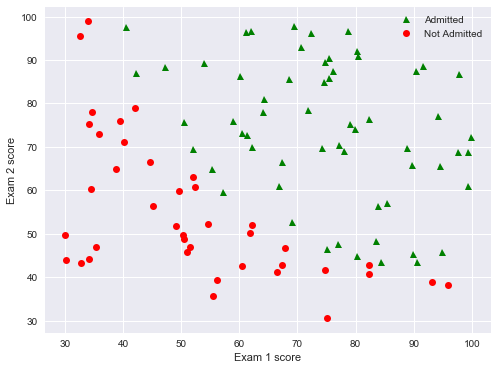

In [5]:
plotData(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

### Sigmoid function

In [6]:
def sigmoid(z):
    '''sigmoid function used for logistic regression'''
    return (np.e**(-z) + 1) ** (-1)

### Cost and gradient functions for Logistic Regression without regularization

Split the original cost function from the course into two, one for compute cost and the other for gradient.

In [7]:
def costFunction(theta, X, y):
    '''Return the cost value computed from a theta with X and y'''
    theta = theta.reshape(X.shape[1], 1)
    return ((-y.T @ np.log(sigmoid(X @ theta)) - (1 - y).T @ np.log(1 - sigmoid(X @ theta))) / len(y)).flatten()

def gradientFunction(theta, X, y):
    '''Return the gradient computed from a theta with X and y'''
    theta = theta.reshape(X.shape[1], 1)
    return ((X.T @ (sigmoid(X @ theta) - y)) / len(y)).flatten()

### Test the cost function and gradient function

In [8]:
X = data[:, :2]
y = data[:, 2]
y = y.reshape(len(y), 1)
m, n = X.shape
X = np.c_[np.ones((m, 1)), X]

initial_theta = np.zeros((n+1,1))
print('Cost at initial theta (zeros): \n', costFunction(initial_theta, X, y))
print('Gradient at initial theta (zeros): \n', gradientFunction(initial_theta, X, y))

test_theta = np.array([-24, .2, .2])
print('\nCost at test theta (zeros): \n', costFunction(test_theta, X, y))
print('Gradient at test theta (zeros): \n', gradientFunction(test_theta, X, y))

Cost at initial theta (zeros): 
 [0.69314718]
Gradient at initial theta (zeros): 
 [ -0.1        -12.00921659 -11.26284221]

Cost at test theta (zeros): 
 [0.21833019]
Gradient at test theta (zeros): 
 [0.04290299 2.56623412 2.64679737]


### Use Scipy's optimize package to replace the Octave fminunc to find the best theta.

To get a little bit deeper into the package, three functions are imported and used.  Check out how they differ.

In [9]:
from scipy.optimize import fmin, fmin_cg, fmin_ncg

theta = fmin(costFunction, x0=initial_theta, args=(X, y))  # Notice this function use only the cost function

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [10]:
print('Cost at theta found by fmin:\n', costFunction(theta, X, y))
print('theta:\n', theta)

Cost at theta found by fmin:
 [0.2034977]
theta:
 [-25.16130062   0.20623142   0.20147143]


In [11]:
fmin_cg(costFunction, x0=initial_theta, fprime=gradientFunction, args=(X, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 51
         Function evaluations: 121
         Gradient evaluations: 121


array([-25.16146986,   0.20623281,   0.20147271])

In [12]:
fmin_ncg(costFunction, initial_theta, gradientFunction, args=(X, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 28
         Function evaluations: 72
         Gradient evaluations: 243
         Hessian evaluations: 0


array([-25.16552305,   0.20626523,   0.2015055 ])

### Plot decision boundry

In [13]:
def plotDecisionBoundry(theta, X, y, degree=6):
    '''Plots the data points X and y into a new figure with the decision boundary defined 
    by theta'''
    plotData(X[:, 1:], y.reshape(len(y)))
    if X.shape[1] <= 3:
        plot_x = np.array([min(X[:, 2]) - 2, max(X[:, 2]) + 2])
        plot_y = (theta[0] + theta[1] * plot_x) * (-1 / theta[2])
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not Admitted', 'Decision Boundary'], fontsize=8)
        plt.xlim(30, 100)
        plt.ylim(30, 100)
    else:
        u = np.linspace(-1, 1.5, 100)
        v = np.linspace(-1, 1.5, 100)
        z = np.zeros((len(u), len(v)))
        for  i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = mapFeature(u[i], v[j], degree) @ theta
        z = z.T
        plt.contour(u, v, z, [0], cmap='rainbow')

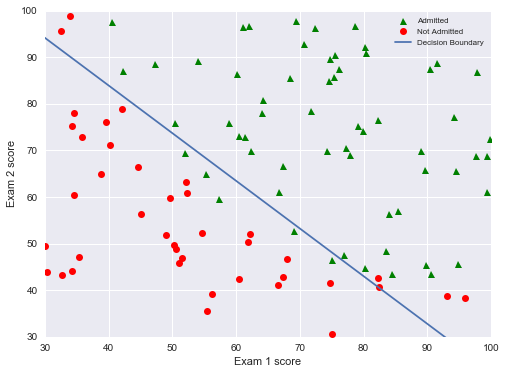

In [14]:
plotDecisionBoundry(theta, X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

### Predict and accuracy

In [15]:
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print('For a student with scores 45 and 85, we predict an admission probability of:\n', prob)

For a student with scores 45 and 85, we predict an admission probability of:
 0.7762915904112411


In [16]:
def predict(theta, X):
    '''Predict whether the label is 0 or 1 using learned logistic regression parameters theta'''
    prob = sigmoid(X @ theta)
    for i in range(len(prob)):
        if prob[i] >= 0.5:
            prob[i] = 1
        else:
            prob[i] = 0
    return prob

In [17]:
p = predict(theta, X)
print('Train Accuracy: \n', np.mean(p == y.reshape(len(y))) * 100)

Train Accuracy: 
 89.0


## ==========
## Logistic Regression with regularization

### Load data

In [18]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
data[:5]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

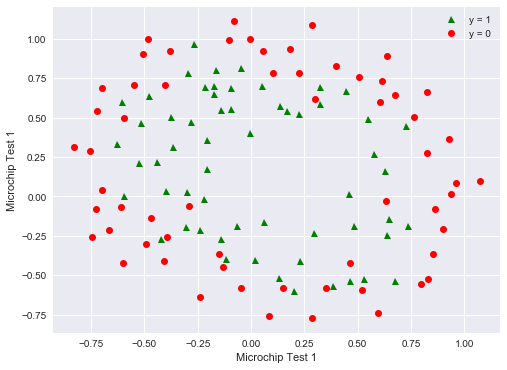

In [19]:
X = data[:, :2]
y = data[:, 2]
plotData(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 1')
plt.legend(['y = 1', 'y = 0'])
plt.show()

### Cost and gradient functions for Logistic Regression without regularization

First define the mapFeature to add polynomial features, and then again, split the original cost function from the course into two, one for compute cost and the other for gradient.

In [20]:
def mapFeature(X1, X2, degree):
    '''Feature mapping function to polynomial features'''
    X_out = np.ones(X1.shape)
    for i in range(1, degree+1):
        for j in range(i+1):
            X_out = np.c_[X_out, X1**(i-j) * X2**j]
    return X_out

def costFunctionReg(theta, X, y, lmd):
    '''Compute cost for logistic regression with regularization'''
    theta = theta.reshape(X.shape[1], 1)
    cost = (-y.T @ np.log(sigmoid(X @ theta)) - (1 - y).T @ \
            np.log(1 - sigmoid(X @ theta))) / len(y)
    reg = lmd / 2 / len(y) * sum(theta[1:] ** 2)
    return (cost + reg).flatten()

def gradientFunctionReg(theta, X, y, lmd):
    '''Compute gradient for logistic regression with regularization'''
    theta = theta.reshape(X.shape[1], 1)
    y = y.reshape(len(y), 1)
    grad0 = ((X[:, 0].T @ (sigmoid(X @ theta) - y)) / len(y))
    grad1 = (((X[:, 1:].T @ (sigmoid(X @ theta) - y)) / len(y)) + lmd / len(y) * theta[1:]).flatten()
    return np.insert(grad1, 0, grad0)


### Test the cost function and gradient function with regularization

In [21]:
X = mapFeature(X[:, 0], X[:, 1], 6)
initial_theta = np.zeros((X.shape[1], 1))
lmd = 1
cost = costFunctionReg(initial_theta, X, y, lmd)
grad = gradientFunctionReg(initial_theta, X, y, lmd)

print('Cost at initial theta (zeros):\n', cost)
print('Gradient at initial theta (zeros) - first five values only:\n', grad[:5])

Cost at initial theta (zeros):
 [0.69314718]
Gradient at initial theta (zeros) - first five values only:
 [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [22]:
test_theta = np.ones((X.shape[1], 1))
lmd = 10
cost = costFunctionReg(test_theta, X, y, lmd)
grad = gradientFunctionReg(test_theta, X, y, lmd)

print('Cost at test theta (with lambda = 10):\n', cost)
print('Gradient at test theta - first five values only:\n', grad[:5])

Cost at test theta (with lambda = 10):
 [3.16450933]
Gradient at test theta - first five values only:
 [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


### Optimization

In [23]:
initial_theta = np.zeros((X.shape[1], 1))
lmd = 1

In [24]:
theta = fmin_ncg(costFunctionReg, initial_theta, gradientFunctionReg, args=(X, y, lmd))

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 72
         Hessian evaluations: 0


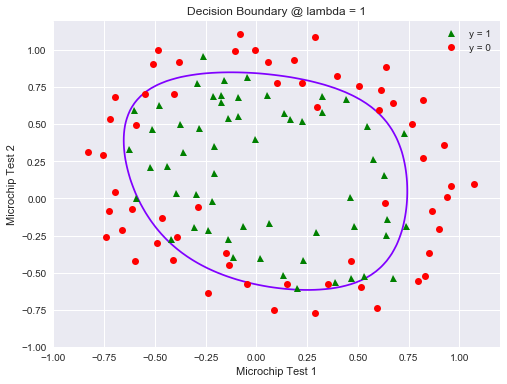

In [25]:
plotDecisionBoundry(theta, X, y)
plt.xlim(-1, 1.2)
plt.ylim(-1, 1.2)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0', 'Decision Boundary'])
plt.title('Decision Boundary @ lambda = 1')
plt.show()

In [26]:
pred = predict(theta, X)
print('Train Accuracy: \n', np.mean(pred == y.reshape(len(y))) * 100)

Train Accuracy: 
 83.05084745762711


### Try different lambda values and plot the decision boundary

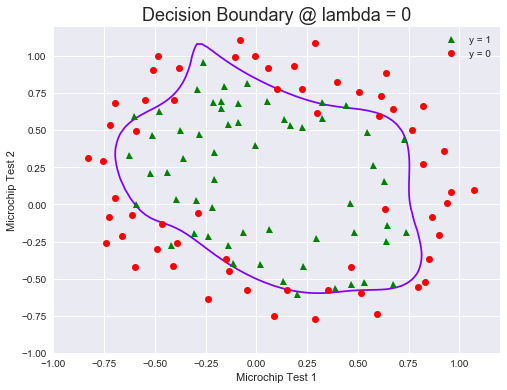

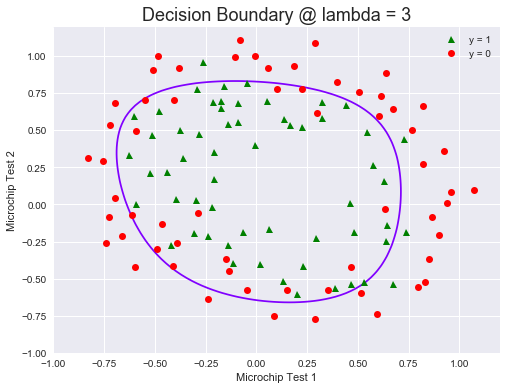

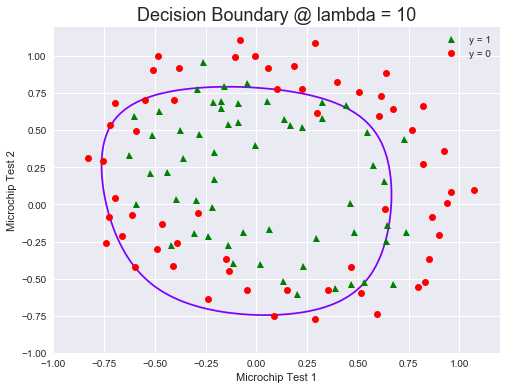

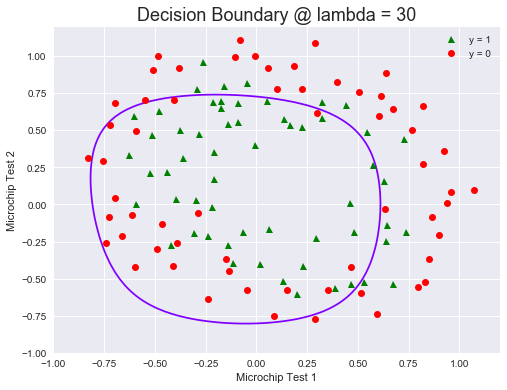

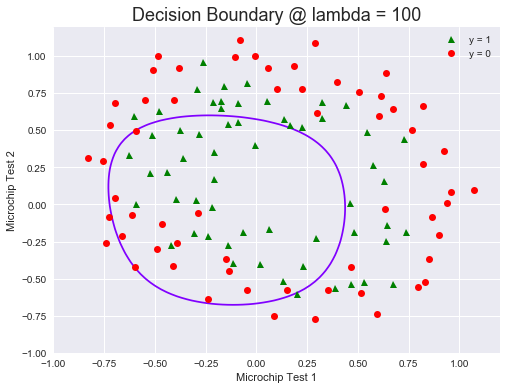

In [27]:
lmd_values = [0, 3, 10, 30, 100]
for lmd in lmd_values:
    theta = fmin_ncg(costFunctionReg, initial_theta, gradientFunctionReg, 
                     args=(X, y, lmd), disp=False)
    plotDecisionBoundry(theta, X, y)
    plt.xlim(-1, 1.2)
    plt.ylim(-1, 1.2)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0', 'Decision Boundary'])
    plt.title('Decision Boundary @ lambda = {}'.format(lmd), fontsize=18)
    plt.show()